# **ML Deployment Assignment**

---

* **Milestone 1**

  1. Use the starter code for your assignment.

  2. Read the garments_worker_productivity.csv data.

  3. In the Notebooks folder use the EDA.ipynb file to perform exploratory data analysis, feature selection/engineering and train your model.

  4. Choose either a regression model or classification model, depending on your chosen target feature.

  5. Use any ML algorithm for your model, try at least 2 ML algorithms and choose the one that performs best.

  6. Use grid search or random search for hyperparameter tuning of your model.

  7. Save your model using a pickle file. If you used any encoder (OneHotEncoder, LabelEncoder, etc.) for features or scaler (StandardScaler, MinMaxScaler, etc.) you need to save them too.

* **Milestone 2**
  8. After your model is saved, you can start your web application. You can use any text editor for this purpose (PyCharm, VScode, Sublime, etc.)

  9. The structure of the application is already given, as well as basic CSS. Modify the HTML/CSS styling if you like, however, the structure should be the same. All HTML files go into the folder "templates", all CSS files go into the folder "static".

  * ''Note
The HTML/CSS part is optional but highly recommended to try out different styles/libraries (Bootstrap, Picnic, etc.)

  10. Use steps learned in the lecture and read in the Learn platform on how to create a virtual environment and install Flask.

  11. In the app.py file, implement the .predict method to make it functional for your predictions.

  12. Make sure your app is working on localhost before deploying it to Heroku.



**The columns in the dataset**

* date : Date in MM-DD-YYYY
* day : Day of the Week
* quarter : A portion of the month. A month was divided into four quarters
* department : Associated department with the instance
* team : Associated team number with the instance
* noofworkers : Number of workers in each team
* noofstylechange : Number of changes in the style of a particular product
* targetedproductivity : Targeted productivity set by the Authority for each team for each day.
* smv : Standard Minute Value, it is the allocated time for a task
* wip : Work in progress. Includes the number of unfinished items for products
* overtime : Represents the amount of overtime by each team in minutes
* incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
* idletime : The amount of time when the production was interrupted due to several reasons
* idlemen : The number of workers who were idle due to production interruption
actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.



 **Our target is to classify whether actual productivity reached the target productivity or not**

**import required libraries**

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Loading and saving models
import pickle

**Check out the Data**

In [111]:
# Load Data
df = pd.read_csv('/content/garments_worker_productivity.csv')

In [112]:
# First 5 rows
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [113]:
# totat rows and column in the data: / or the size of the data
df.shape

(1197, 15)

In [114]:
# info about the  data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [115]:
# describe the data:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [116]:
#checking duplicate values in dataset
df.duplicated().sum()

0

In [117]:
# column name of the data:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [118]:
#number of unique values in column
df.nunique()

date                      59
quarter                    5
department                 3
day                        6
team                      12
targeted_productivity      9
smv                       70
wip                      548
over_time                143
incentive                 48
idle_time                 12
idle_men                  10
no_of_style_change         3
no_of_workers             61
actual_productivity      879
dtype: int64

In [119]:
# checking null values in dataset
df.isna().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

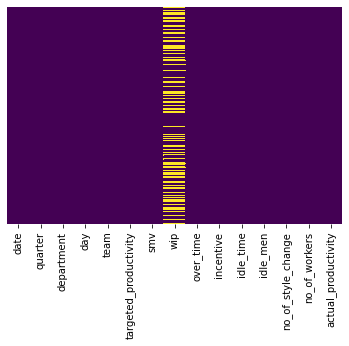

In [120]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# **Data Cleaning**

In [121]:
# See Quarter data
df["quarter"].unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

In [122]:
df["day"].unique()

array(['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype=object)

**Actually it's just two department**

In [123]:
df["department"].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [124]:
df['department'].replace('sweing', 'sewing', inplace=True)
df['department'].replace('finishing ', 'finishing', inplace=True)
df['department'].value_counts()

sewing       691
finishing    506
Name: department, dtype: int64

In [125]:
# Convert date to datetime object_ for look better in visualization
df["date"] = pd.to_datetime(df["date"])

In [126]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,2015-01-01,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,2015-01-01,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


**Dealing with null value in (wip) column using represent the ground truth via imputation with 0's**

In [127]:
zero_imputer = SimpleImputer( strategy='constant', fill_value=0)
df["wip"] = pd.Series(zero_imputer.fit_transform(np.array(df["wip"]).reshape(1, -1)).reshape(-1))

In [128]:
# checking again the null values in dataset
df.isna().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

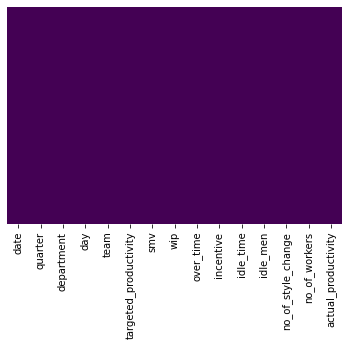

In [129]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## **Exploratory Data Analysis [EDA]**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1d987dfd10>,
      dtype=object)

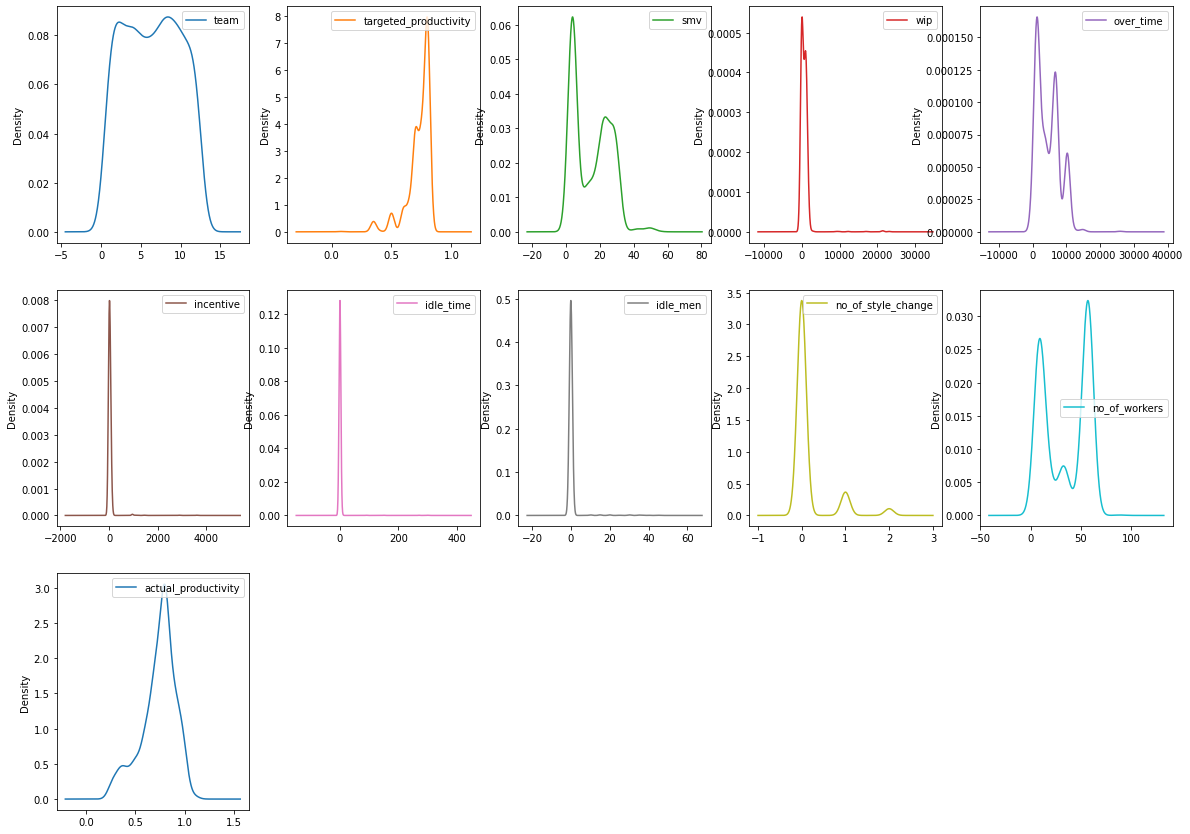

In [130]:
df.iloc[:, 1:].plot.density(subplots=True, 
layout=(4,5), figsize=(20, 20), sharex = False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1d98030f10>,
      dtype=object)

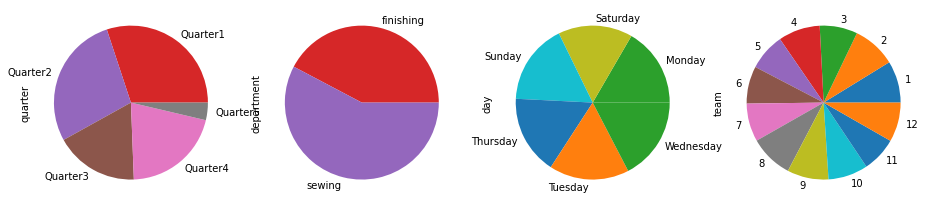

In [131]:
df.iloc[:, 1:5].apply(pd.Series.value_counts).plot.pie(subplots=True, layout=(2, 5), 
figsize=(20, 10), sharex = False, legend = False)

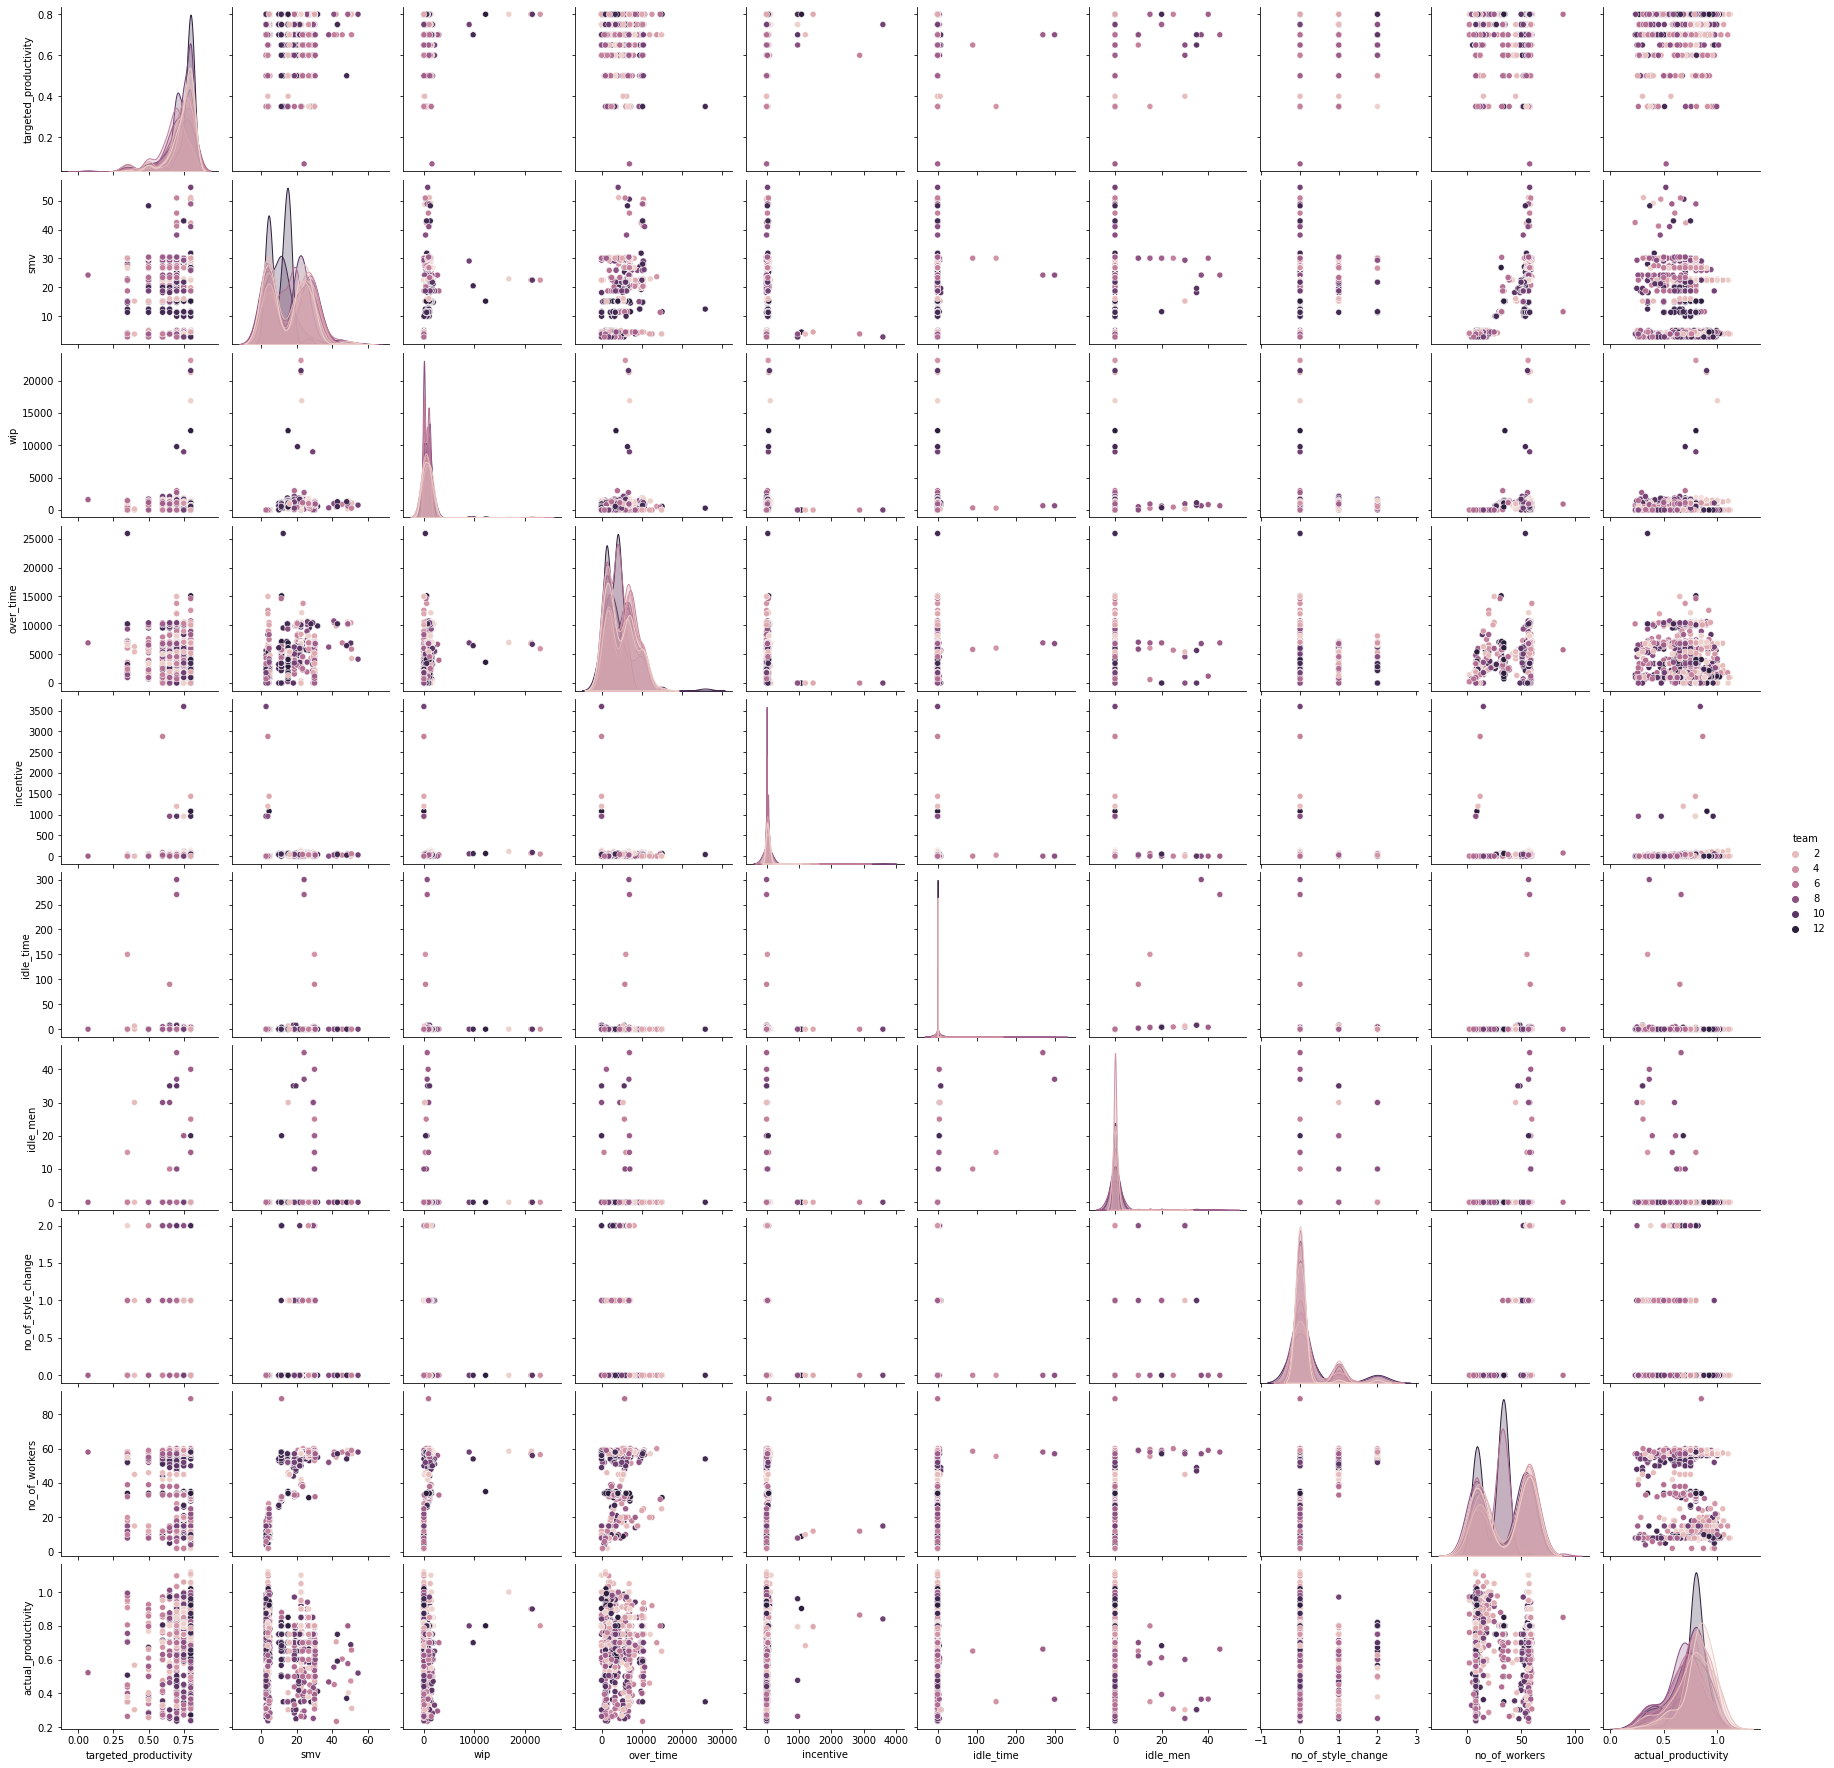

In [132]:
sns.pairplot(df, hue = "team")

* The most trend we can see here is between **incentive** and **actual productivity**. 
* **Target productivity** also seems to be strongly correlated with **actual productivity**.

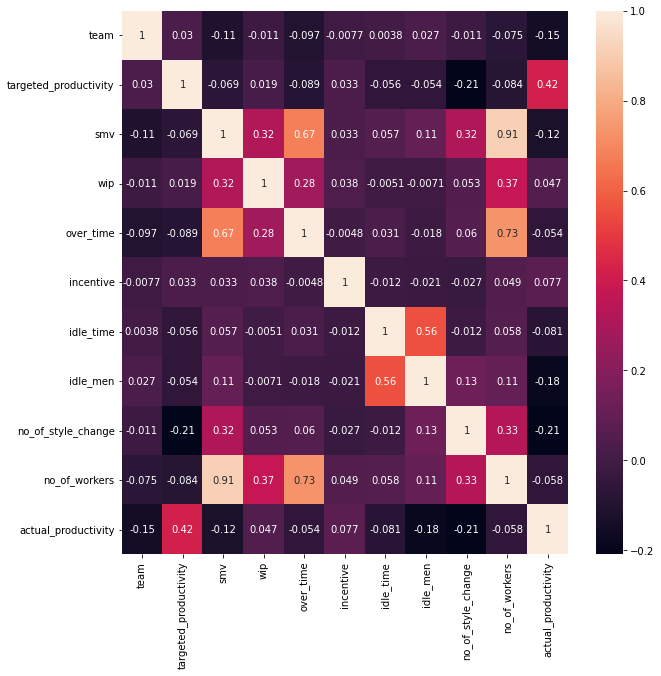

In [133]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True)

(array([735599., 735613., 735630., 735644., 735658.]),
 <a list of 5 Text major ticklabel objects>)

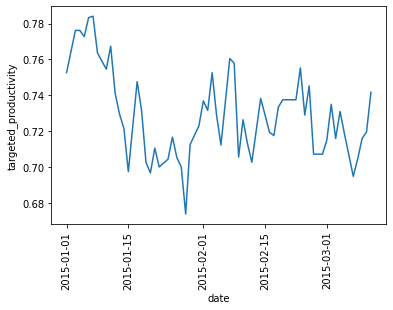

In [134]:
#Targeted Productivity over time
sns.lineplot(data = df, x = "date", y = "targeted_productivity", ci = None)
plt.xticks(rotation=90)

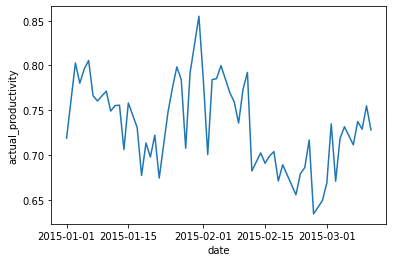

In [135]:
#Actual Productivity over Time
sns.lineplot(data = df, x = "date", y = "actual_productivity", ci = None)

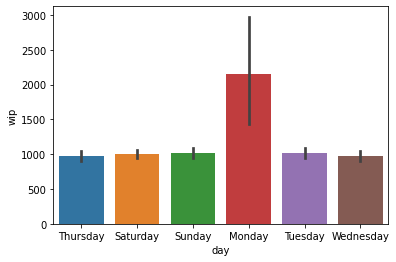

In [136]:
#Distribution of wip and day of the week
df_wip = df[df.wip > 0]
sns.barplot(x="day", y="wip", data=df_wip)

**Outlire**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

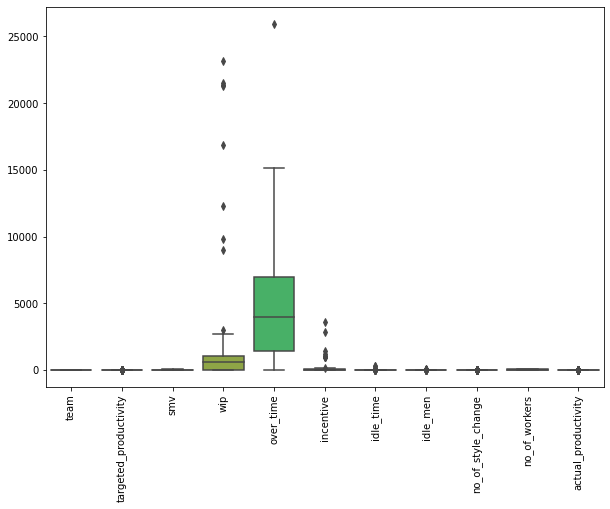

In [137]:
# outlire df
plt.figure(figsize=(10,7))
sns.boxplot(data=df)
plt.xticks(rotation=90)

**The column (wip) have huge outliers**

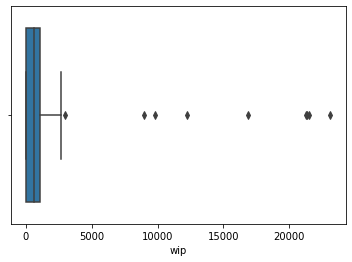

In [138]:
sns.boxplot(x='wip', data=df)

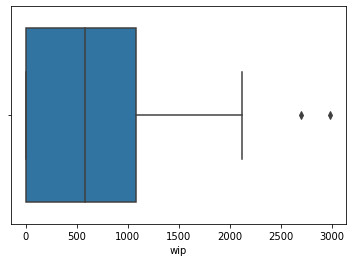

In [139]:
df = df[df['wip'] <= 5000]
sns.boxplot(x='wip', data=df)

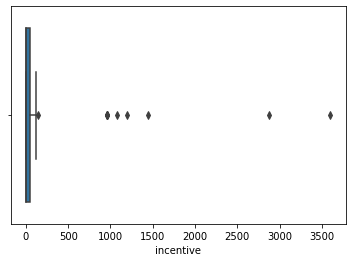

In [140]:
sns.boxplot(x='incentive', data=df)

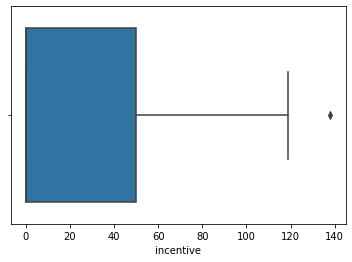

In [141]:
df = df[df['incentive'] <= 500]
sns.boxplot(x='incentive', data=df)

* **I will discard the column (date) because it's shows no importance,
also the two column (idle_men) and (idle_time) is useless for predicting because almost all of their values are zero**

  - Target productivity has 2 decimal digits.
  - Productivity may fluctuate, so check if the actual productivity misses target + 0.001

In [142]:
X = df.drop(columns=['actual_productivity', 'idle_time', 'idle_men', 'date'])
y = df['actual_productivity'] < df['targeted_productivity'] + 0.001

y.value_counts()

True     700
False    479
dtype: int64

**Dataset is imbalanced** 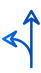

**Dataset split**

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, stratify=y,random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train,random_state=0)  # 0.25 x 0.8 = 0.2

In [144]:
X_train.shape, X_test.shape

((707, 11), (236, 11))

**One-hot encoding and Normalization**

In [145]:
categorical_features = ['quarter', 'department', 'day', 'team']
transformer = make_column_transformer((preprocessing.OneHotEncoder(), categorical_features),(preprocessing.StandardScaler(),
   ['smv', 'wip', 'over_time', 'incentive', 'no_of_style_change', 'no_of_workers']),
    remainder='passthrough',sparse_threshold=0, verbose_feature_names_out=False)

transformer.fit(X_train)

X_train = pd.DataFrame(transformer.transform(X_train),index=X_train.index, columns=transformer.get_feature_names_out())

X_val = pd.DataFrame(transformer.transform(X_val),index=X_val.index,columns=transformer.get_feature_names_out())

X_test = pd.DataFrame(transformer.transform(X_test), index=X_test.index, columns=transformer.get_feature_names_out())

X_test

,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sewing,day_Monday,day_Saturday,day_Sunday,...,team_10,team_11,team_12,smv,wip,over_time,incentive,no_of_style_change,no_of_workers,targeted_productivity
556,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.491114,1.083047,0.498349,1.657714,-0.346991,0.897846,0.70
689,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.408707,0.478655,0.756926,-0.805859,2.131013,1.076858,0.35
700,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.046998,0.578812,-0.129624,0.836523,-0.346991,0.002785,0.80
310,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.713171,0.989798,1.745059,0.343808,-0.346991,1.009729,0.65
972,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.344476,0.392314,0.018135,1.033609,4.609016,1.076858,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.168298,-0.041122,0.756926,-0.017516,2.131013,1.076858,0.70
1167,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.124076,0.677241,0.276711,0.508047,2.131013,0.495069,0.70
544,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.751710,1.756512,-0.443610,2.905925,-0.346991,1.099235,0.80
286,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.023318,1.255730,1.745059,0.836523,-0.346991,1.009729,0.80


#  **Building Machine Learning Models** 

In [146]:
def get_perf_metrics(model):
    model_name = type(model).__name__
    print(f"Training {model_name} model...")
    model.fit(X_train, y_train)
    print(f"Completed {model_name} model training.")
    y_pred = model.predict(X_val)

    df_perf_metrics = pd.DataFrame(columns=['Training_Accuracy', 'Validation: Accuracy', 'Precision', 'Recall','f1_weighted'])

    df_perf_metrics.loc[model_name] = [
        model.score(X_train, y_train),
        model.score(X_val, y_val),
        precision_score(y_val, y_pred),
        recall_score(y_val, y_pred),
        f1_score(y_val, y_pred, average='weighted'),
    ]

    print("Completed {} model's performance assessment.".format(model_name))
    return df_perf_metrics

In [147]:
models_list = [
    LogisticRegression(random_state=0),
    RandomForestClassifier(random_state=0),
]

df_perf_metrics = pd.concat([get_perf_metrics(model) for model in models_list],axis=0)

df_perf_metrics

Training LogisticRegression model...
Completed LogisticRegression model training.
Completed LogisticRegression model's performance assessment.
Training RandomForestClassifier model...
Completed RandomForestClassifier model training.
Completed RandomForestClassifier model's performance assessment.


,Training_Accuracy,Validation: Accuracy,Precision,Recall,f1_weighted
LogisticRegression,0.787836,0.800847,0.825175,0.842857,0.800322
RandomForestClassifier,1.000000,0.885593,0.906475,0.900000,0.885685


# **Hyperparameter tuning**

In [148]:
rfc = RandomForestClassifier(random_state=0)
parameters = {"n_estimators": [64, 128, 256], "max_depth": [4, 8, 16, None]}

from sklearn.model_selection import GridSearchCV

cv = GridSearchCV(rfc, parameters, cv=5, scoring='f1_weighted')
cv.fit(X_train, y_train.values.ravel())


def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean, std, params in zip(mean_score, std_score, params):
        print(f'{round(mean,3)} +-{round(std,3)} for {params}')


display(cv)

Best parameters are: {'max_depth': 16, 'n_estimators': 128}


0.788 +-0.048 for {'max_depth': 4, 'n_estimators': 64}
0.785 +-0.042 for {'max_depth': 4, 'n_estimators': 128}
0.789 +-0.04 for {'max_depth': 4, 'n_estimators': 256}
0.822 +-0.02 for {'max_depth': 8, 'n_estimators': 64}
0.821 +-0.025 for {'max_depth': 8, 'n_estimators': 128}
0.82 +-0.034 for {'max_depth': 8, 'n_estimators': 256}
0.82 +-0.028 for {'max_depth': 16, 'n_estimators': 64}
0.83 +-0.033 for {'max_depth': 16, 'n_estimators': 128}
0.828 +-0.028 for {'max_depth': 16, 'n_estimators': 256}
0.82 +-0.034 for {'max_depth': None, 'n_estimators': 64}
0.82 +-0.033 for {'max_depth': None, 'n_estimators': 128}
0.828 +-0.029 for {'max_depth': None, 'n_estimators': 256}


# **The best Model is Random Forest Classifier the accuracy is 0.85**

In [149]:
model = RandomForestClassifier(max_depth=8, n_estimators=128,
                               random_state=0).fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.84      0.84      0.84        96
        True       0.89      0.89      0.89       140

    accuracy                           0.87       236
   macro avg       0.87      0.87      0.87       236
weighted avg       0.87      0.87      0.87       236



# **Save ML Model and Encoder**

In [150]:
# Note it is important to save both the model and the encoder... why the encoder?
# Note: encoder is all the preprocessing steps --> WITH THERE ORDER "Order of steps and columns is important "

pickle.dump(transformer, open('../encoder.pkl', 'wb'))
pickle.dump(cv, open('../model.pkl','wb'))

In [151]:
# Load just to check that model and encoder is working
encoder = pickle.load(open('../encoder.pkl', 'rb'))
model = pickle.load(open('../model.pkl', 'rb'))

In [152]:
y_preds = model.predict(X_test)

In [153]:
ss = pd.Series(y_preds, name='Predicted')

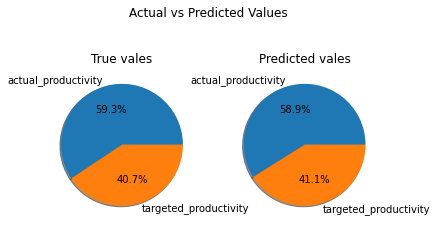

In [154]:
# plot true vs predicted values
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Actual vs Predicted Values')

# First Chart
ax1.set_title('True vales')
ax1.pie(y_test.value_counts(), labels=['actual_productivity','targeted_productivity'], autopct='%1.1f%%', shadow=True)

# Second Chart
ax2.pie(ss.value_counts(), labels=['actual_productivity','targeted_productivity'], autopct='%1.1f%%', shadow=True)
ax2.set_title('Predicted vales')
plt.show()
